#### Matrix Eigenvectors for Terrace Shape Quantification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

**Creating example np array point clouds - circle and square**

In [2]:
# Square and circle point clouds on a 50x50 grid

N_grid = 50
min_val, max_val = -1, 1

# Create a 50x50 grid
x_grid = np.linspace(min_val, max_val, N_grid)
y_grid = np.linspace(min_val, max_val, N_grid)
xx, yy = np.meshgrid(x_grid, y_grid)
points = np.column_stack((xx.ravel(), yy.ravel()))

# Square point cloud: select only boundary points
square_mask = (np.isclose(points[:, 0], min_val) | np.isclose(points[:, 0], max_val) |
               np.isclose(points[:, 1], min_val) | np.isclose(points[:, 1], max_val))
square_array = points[square_mask]

# Circle point cloud: select points near the circumference
radius = 1
circle_mask = np.isclose(np.sqrt(points[:, 0]**2 + points[:, 1]**2), radius, atol=1/N_grid)
circle_array = points[circle_mask]

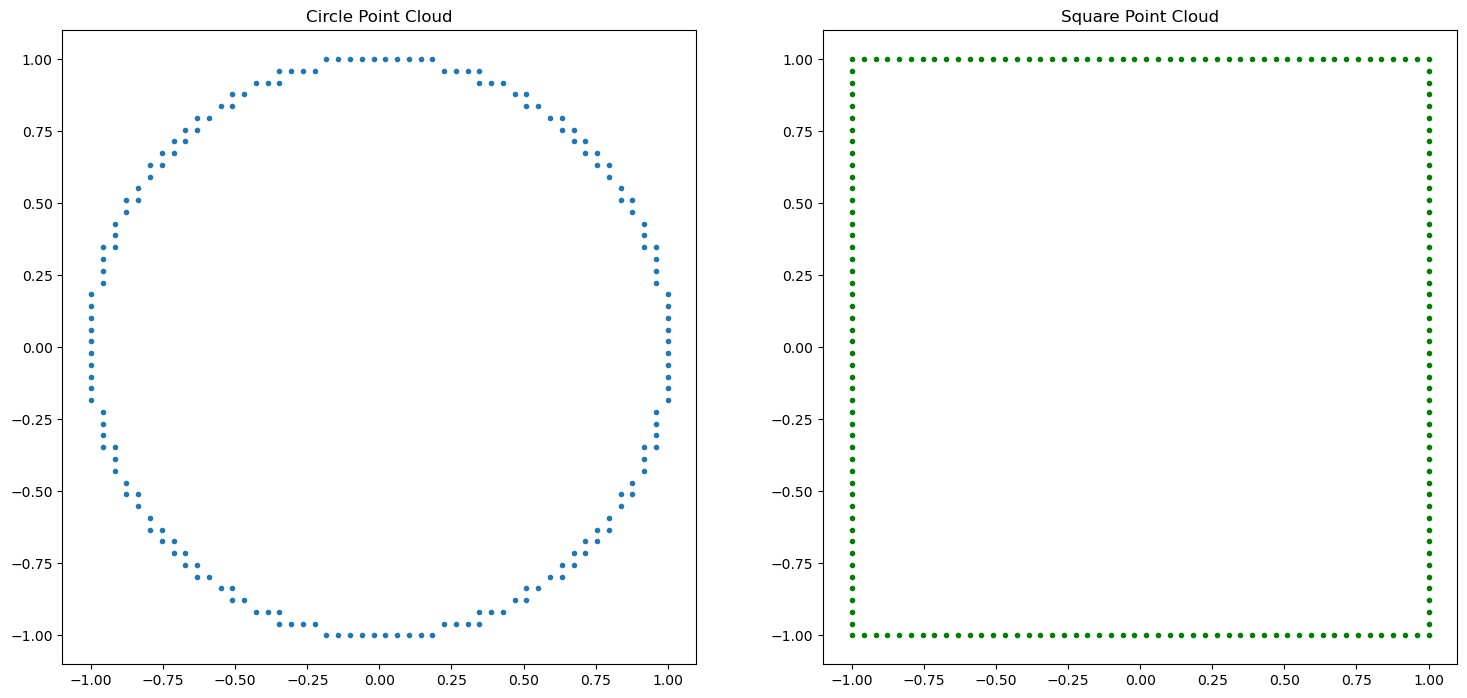

In [3]:
# Plotting both point clouds
fig, ax = plt.subplots(1, 2, figsize=(18, 9))

# Plot square
ax[0].scatter(circle_array[:, 0], circle_array[:, 1], marker='.')
ax[0].set_title("Circle Point Cloud")
ax[0].set_aspect('equal', adjustable='box')

# Plot circle
ax[1].scatter(square_array[:, 0], square_array[:, 1], marker='.', c='green')
ax[1].set_title("Square Point Cloud")
ax[1].set_aspect('equal', adjustable='box')

plt.show()

**Computing distance and closeness matrices for our point clouds**

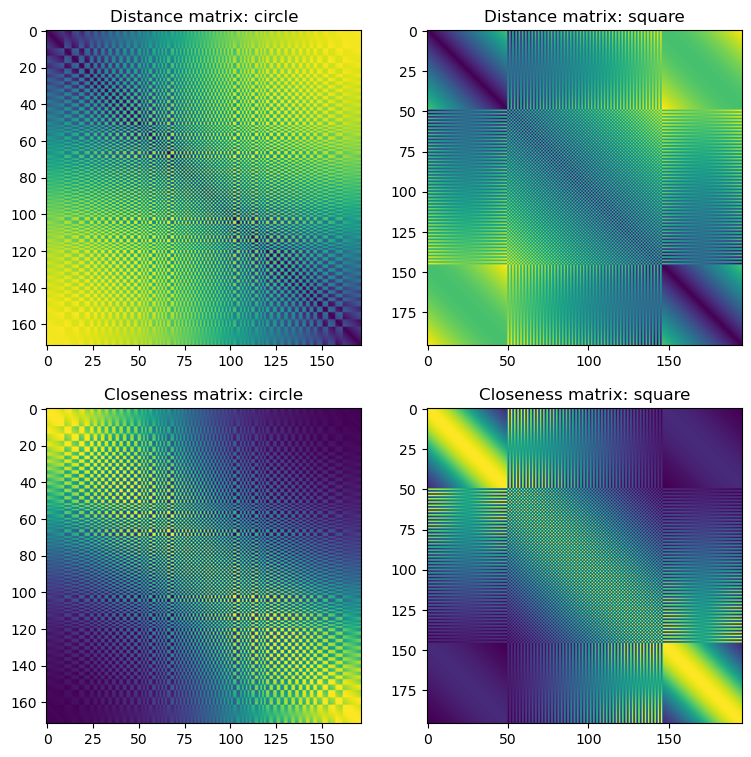

In [4]:
# Distance matrices
dist_matrix_circle = distance_matrix(circle_array, circle_array)
dist_matrix_square = distance_matrix(square_array, square_array)

# Gaussian kenel to tansform to a closeness matrix**
sigma = 1
closeness_matrix_circle = np.exp(-dist_matrix_circle**2/(2*sigma**2))
closeness_matrix_square = np.exp(-dist_matrix_square**2/(2*sigma**2))
 
# Plotting 
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
ax[0,0].imshow(dist_matrix_circle)
ax[0,0].set_title('Distance matrix: circle')
ax[0,1].imshow(dist_matrix_square)
ax[0,1].set_title('Distance matrix: square')
ax[1,0].imshow(closeness_matrix_circle)
ax[1,0].set_title('Closeness matrix: circle')
ax[1,1].imshow(closeness_matrix_square)
ax[1,1].set_title('Closeness matrix: square')
plt.show()

/Users/user/mambaforge/envs/afml/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Eigenvectors: square')

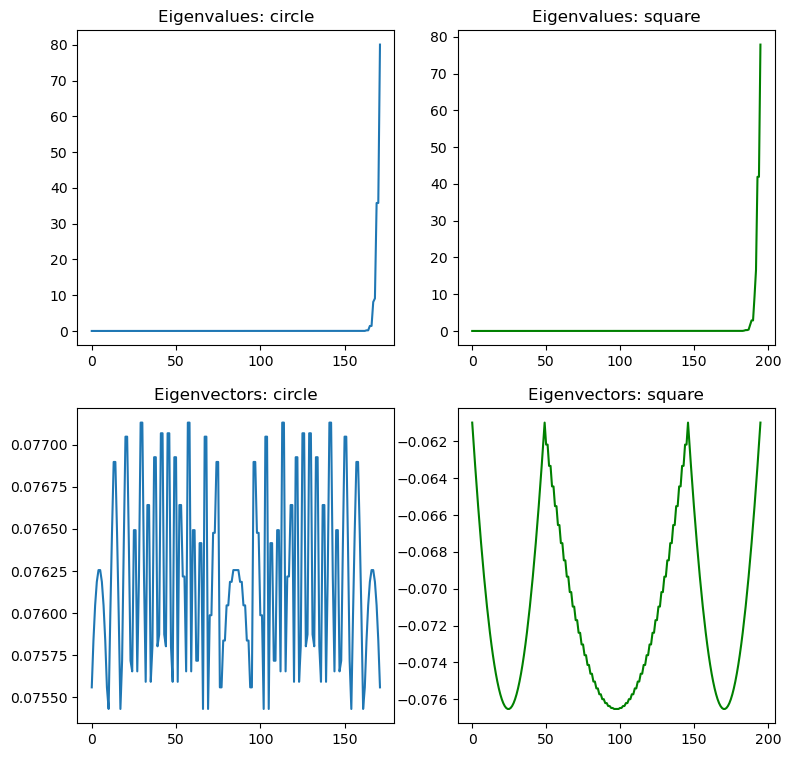

In [5]:
# compute eigenvalues and eigenvectors
eigvals_circle, eigvecs_circle = np.linalg.eig(closeness_matrix_circle)
eigvals_square, eigvecs_square = np.linalg.eig(closeness_matrix_square)

fig, ax = plt.subplots(2, 2, figsize=(9, 9))
ax[0,0].plot(np.sort(np.real(eigvals_circle)))
ax[0,0].set_title('Eigenvalues: circle')
ax[0,1].plot(np.sort(np.real(eigvals_square)), c='g')
ax[0,1].set_title('Eigenvalues: square')
ax[1,0].plot(eigvecs_circle[:,0])
ax[1,0].set_title('Eigenvectors: circle')
ax[1,1].plot(eigvecs_square[:,0], c='g')
ax[1,1].set_title('Eigenvectors: square')